# Supermarket Sales Prediction

## Objective
To build a machine learning model that predicts total sales per transaction and provides insights to support inventory management, staffing, and business strategy.

## Procedure
1. To Import Libraries
2. Load Dataset
3. Handle Dates and Times
4. Feature Selection
5. Train-Test Split
6. Model Building
7. Visualizations

In [1]:
## Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [2]:
## To load dataset
df = pd.read_csv(r"c:\Users\HELLO\Downloads\SuperMarket Analysis.csv")
df.columns = df.columns.str.strip()
print(df.columns)
print(df.head())

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Sales', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')
    Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428   Alex     Yangon        Member  Female   
1  226-31-3081   Giza  Naypyitaw        Normal  Female   
2  631-41-3108   Alex     Yangon        Normal  Female   
3  123-19-1176   Alex     Yangon        Member  Female   
4  373-73-7910   Alex     Yangon        Member  Female   

             Product line  Unit price  Quantity   Tax 5%     Sales       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22         8  23.2880  489.0480  

In [3]:
## Handle Dates and Times
df['Date'] = pd.to_datetime(df['Date'], errors='coerce', infer_datetime_format=True)
df = df.dropna(subset=['Date'])
df['DayOfWeek'] = df['Date'].dt.day_name()

C:\Users\HELLO\AppData\Local\Temp\ipykernel_4840\1217488907.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce', infer_datetime_format=True)


In [4]:
## Feature Selection
features = ['Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Unit price', 'Quantity', 'Payment']
X = df[features]
y = df['Sales'] 

# Encode categorical variables
le = LabelEncoder()
for col in ['Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Payment']:
    X[col] = le.fit_transform(X[col])

C:\Users\HELLO\AppData\Local\Temp\ipykernel_4840\3235204365.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])
C:\Users\HELLO\AppData\Local\Temp\ipykernel_4840\3235204365.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])
C:\Users\HELLO\AppData\Local\Temp\ipykernel_4840\3235204365.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

In [5]:
## Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
## Model Building
## Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Linear Regression RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("Linear Regression R2:", r2_score(y_test, y_pred_lr))

## Decision Tree Regressor
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("Decision Tree RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_dt)))
print("Decision Tree R2:", r2_score(y_test, y_pred_dt))

## Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("Random Forest R2:", r2_score(y_test, y_pred_rf))

## Feature Importance from Random Forest
importance = rf.feature_importances_
for i,v in enumerate(importance):
    print(f'Feature: {features[i]}, Importance: {v:.3f}')

Linear Regression RMSE: 79.6893420666979
Linear Regression R2: 0.902390282355402
Decision Tree RMSE: 12.944900695013077
Decision Tree R2: 0.9974243311813022
Random Forest RMSE: 8.281787554972533
Random Forest R2: 0.9989457569525743
Feature: Branch, Importance: 0.000
Feature: City, Importance: 0.000
Feature: Customer type, Importance: 0.000
Feature: Gender, Importance: 0.000
Feature: Product line, Importance: 0.000
Feature: Unit price, Importance: 0.480
Feature: Quantity, Importance: 0.519
Feature: Payment, Importance: 0.000


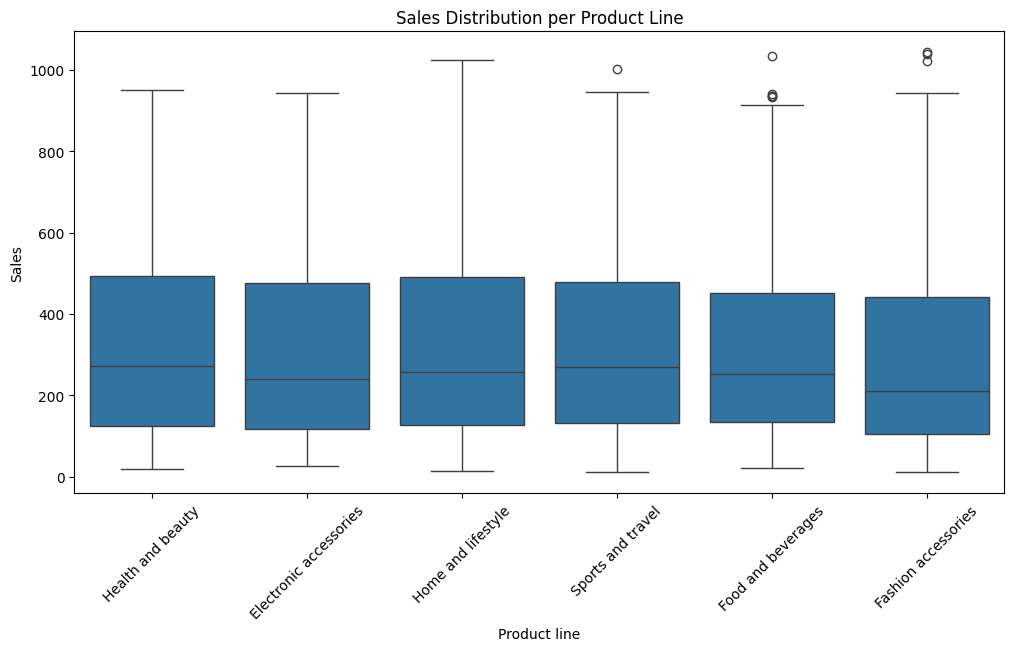

In [7]:
## Visualizations
## Sales per Product Line (Boxplot)
plt.figure(figsize=(12,6))
sns.boxplot(x='Product line', y='Sales', data=df)
plt.xticks(rotation=45)
plt.title('Sales Distribution per Product Line')
plt.show()

<Figure size 1400x700 with 0 Axes>

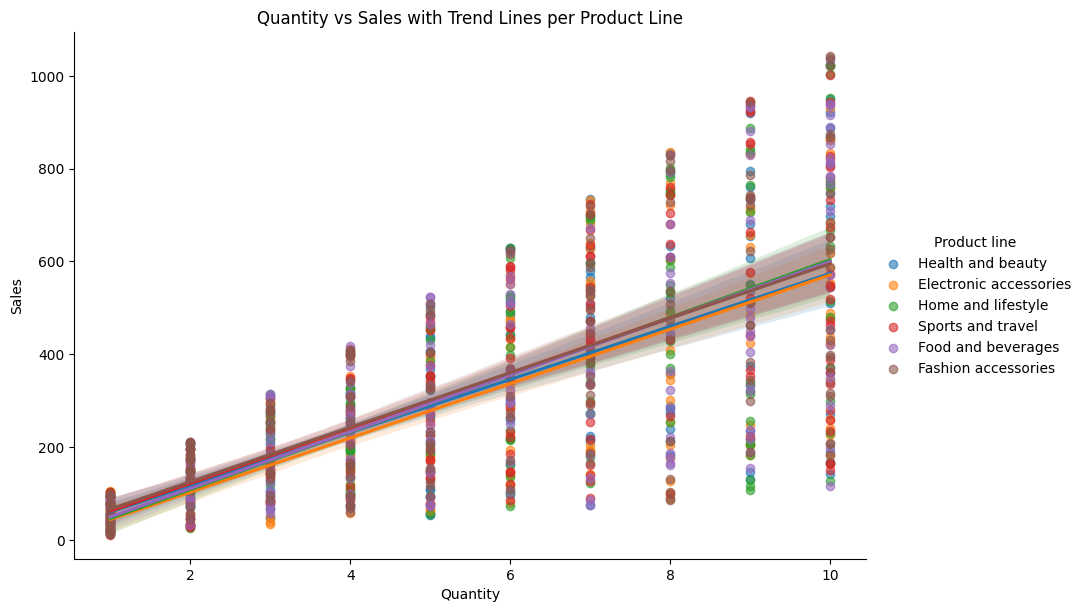

In [9]:
## Quantity vs Sales
plt.figure(figsize=(14,7))
sns.lmplot(x='Quantity', y='Sales', hue='Product line', data=df, aspect=1.5, height=6, scatter_kws={'alpha':0.6})
plt.title('Quantity vs Sales with Trend Lines per Product Line')
plt.xlabel('Quantity')
plt.ylabel('Sales')
plt.show()

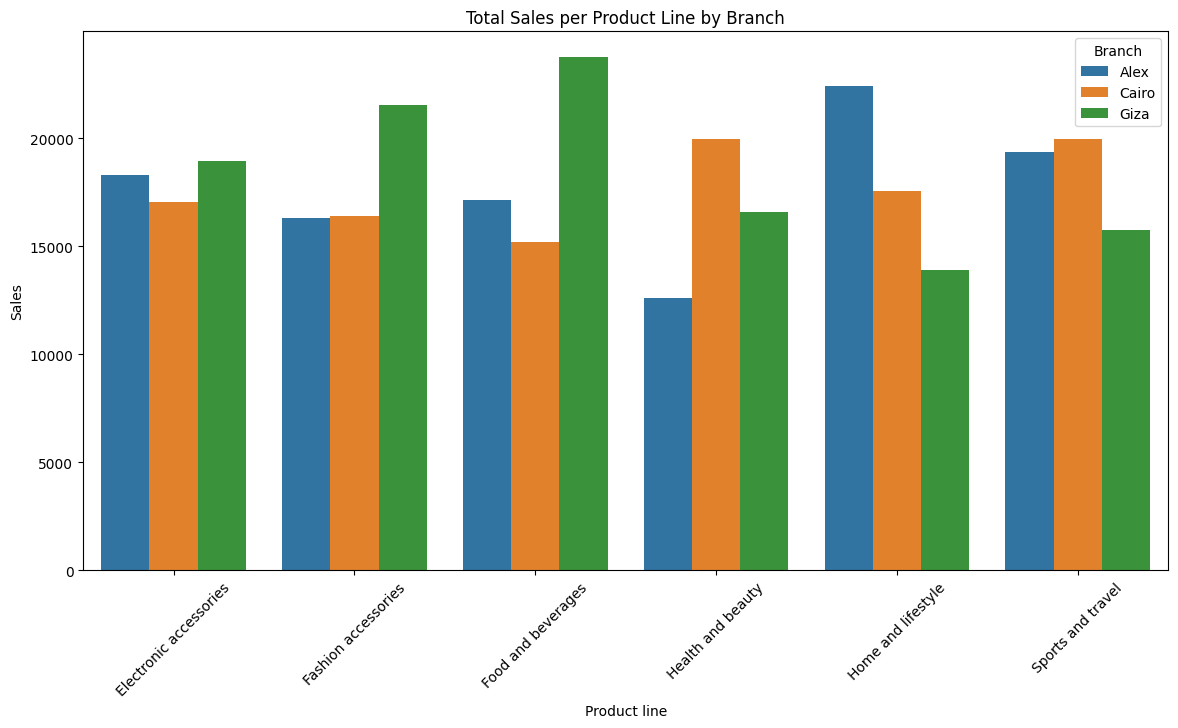

In [10]:
## Total Sales per Product Line by Branch
plt.figure(figsize=(14,7))
sales_by_product_branch = df.groupby(['Product line', 'Branch'])['Sales'].sum().reset_index()
sns.barplot(x='Product line', y='Sales', hue='Branch', data=sales_by_product_branch)
plt.xticks(rotation=45)
plt.title('Total Sales per Product Line by Branch')
plt.show()

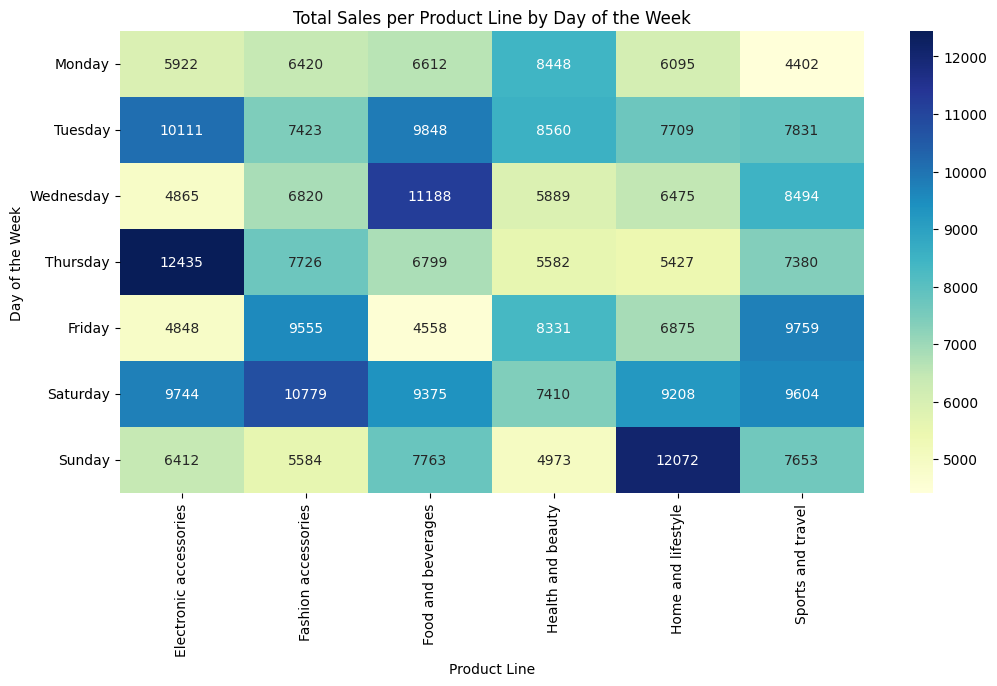

In [12]:
## Heatmap: Sales by Day of Week and Product Line
sales_by_day_product = df.groupby(['DayOfWeek', 'Product line'])['Sales'].sum().reset_index()
sales_pivot = sales_by_day_product.pivot(index='DayOfWeek', columns='Product line', values='Sales')
days_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
sales_pivot = sales_pivot.reindex(days_order)

plt.figure(figsize=(12,6))
sns.heatmap(sales_pivot, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title('Total Sales per Product Line by Day of the Week')
plt.ylabel('Day of the Week')
plt.xlabel('Product Line')
plt.show()

In [ ]:
## let feature importance which tells us what actually drives sales
feature_importance = pd.Series(
    rf.feature_importances_,
    index=features
).sort_values(ascending=False)

print(feature_importance)


Quantity         0.518901
Unit price       0.479858
Product line     0.000361
Payment          0.000219
Branch           0.000199
City             0.000181
Gender           0.000147
Customer type    0.000134
dtype: float64


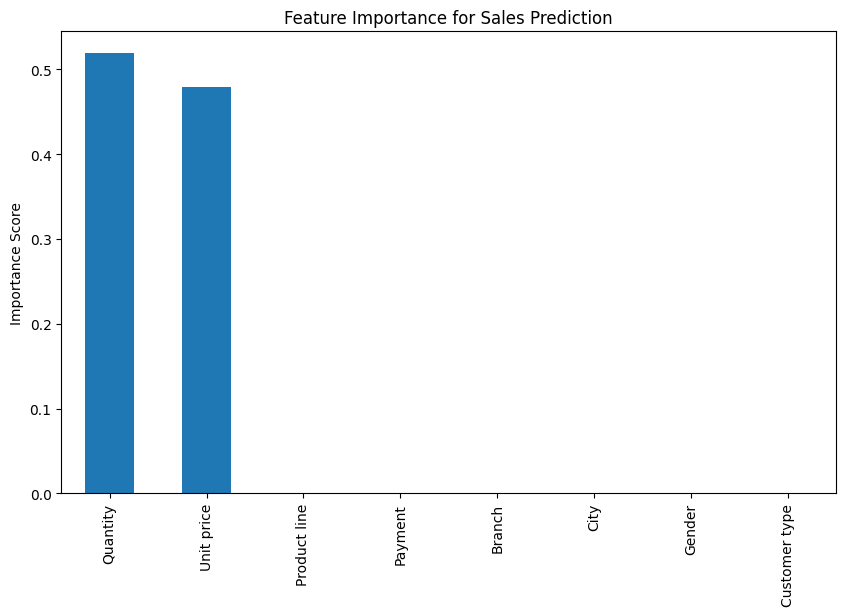

In [ ]:
## Feature importance visualization
plt.figure(figsize=(10,6))
feature_importance.plot(kind='bar')
plt.title('Feature Importance for Sales Prediction')
plt.ylabel('Importance Score')
plt.show()


## To Analyze the dataset and identify patterns that affect total sales.

The dataset analysis revealed that total sales are mainly influenced by the quantity purchased and unit price, with higher quantities and higher-priced products leading to increased transaction values. Sales also vary across product lines and branches, indicating differences in customer preferences and location-based demand. Additionally, member customers and cashless payment methods tend to generate higher sales. Time-based patterns show that sales peak during specific hours and days, highlighting opportunities to optimize staffing, inventory, and promotions.

## Build machine learning models to predict total sales. 

Based on the machine learning models built, total sales were predicted using key features such as quantity, unit price, product line, branch, customer type, and payment method. Among the models evaluated, the Random Forest Regressor produced the most accurate predictions, achieving the lowest error and highest predictive performance. This demonstrates that the model can effectively capture complex relationships in transaction data and reliably forecast total sales.

## Evaluate model performance and select the best-performing model. 

Model performance was evaluated using Root Mean Squared Error (RMSE) and R² score to measure prediction accuracy and explanatory power. Linear Regression and Decision Tree models provided reasonable results but showed limitations in capturing complex patterns. The Random Forest Regressor outperformed the other models by achieving the lowest RMSE and highest R² score, making it the best-performing model for predicting total sales.

## Provide actionable insights that could support business decision-making. 

The analysis revealed that total sales are primarily influenced by quantity purchased, unit price, and product line. Time-based patterns showed higher sales during specific hours and days of the week, indicating peak shopping periods. The Random Forest model outperformed other models, achieving the lowest prediction error and highest explanatory power. These insights suggest that supermarkets can improve revenue by optimizing inventory for high-performing product lines, promoting bulk purchases, aligning staffing with peak hours, and enhancing customer loyalty programs.